In [61]:
import pandas as pd
import json
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Get BGStats export Json

In [3]:
# Reading the json as a dict
with open('data/BGStatsExport.json') as json_data:
    data = json.load(json_data)

In [4]:
games = pd.DataFrame(data['games'])
plays = pd.DataFrame(data['plays'])
players = pd.DataFrame(data['players'])

In [5]:
keepers = ['playerScores', 'playDate','durationMin','gameRefId']
plays = plays.loc[:,keepers]

### Clean `plays` df

In [ ]:
import re

In [6]:
coop = []
scores_diff = []
winner = []
jul_paula = []
jul_and_paula = []
players_plays = []
number_players = []
for r in plays.iterrows():
    number_players.append(len(r[1]['playerScores']))
    players_play = []
    scores_play = []
    winner_play = []
    for player in range(len(r[1]['playerScores'])):
        if r[1]['playerScores'][player]['score'] != '':
            scores_play.append(int(float(r[1]['playerScores'][player]['score'].replace(',', ''))))
        if r[1]['playerScores'][player]['winner'] == True:
            winner_play.append(r[1]['playerScores'][player]['playerRefId'])
        players_play.append(r[1]['playerScores'][player]['playerRefId'])   

    if not scores_play:
        coop.append(1)
    else: 
        coop.append(0)
    
    if all(elem in players_play for elem in [2,3]):
        jul_and_paula.append(True)
        if len(players_play) == 2:
            jul_paula.append(True)
        else: 
            jul_paula.append(False)
        if scores_play: 
            scores_diff.append(max(scores_play)-min(scores_play))
        else: 
            scores_diff.append(np.nan) 
    else:    
        scores_diff.append(np.nan)
        jul_paula.append(False)
        jul_and_paula.append(False)
    if len(winner_play) > 1:
        winner.append('')
    elif not winner_play:
        winner.append('')
    else:
        winner.append(winner_play[0])

In [8]:
players.drop(['isAnonymous', 'modificationDate', 'uuid','bggUsername'], axis = 1, inplace= True)

In [9]:
ids = players['id'].tolist()
names = players['name'].tolist()

In [10]:
players_dic = dict(zip(ids, names))

In [12]:
winner_name = []
for entry in winner:
    if entry != '':
        winner_name.append(players_dic[entry])
    else:
        winner_name.append(np.nan)

In [13]:
players_plays_names = []
for entry in players_plays:
    p = []
    for player in entry:
        p.append(players_dic[player])
    players_plays_names.append(p)

In [14]:
plays = plays[['playDate', 'durationMin', 'gameRefId']]

In [16]:
plays['number_players'] = number_players
plays['jul vs paula'] = jul_paula
plays['jul and paula'] = jul_and_paula
plays['coop'] = coop
plays['winner'] = winner_name
plays['scores difference'] = scores_diff

In [35]:
plays['playDate'] = pd.to_datetime(plays['playDate'] )  

In [36]:
plays.head()

,playDate,durationMin,gameRefId,number_players,jul vs paula,jul and paula,coop,winner,scores difference
0,2021-08-08 15:33:50,24,98,2,True,True,0,Jul,0.0
1,2021-08-08 15:20:09,25,98,2,True,True,0,Jul,5.0
2,2021-08-08 14:54:54,20,98,2,True,True,0,Paula,4.0
3,2021-08-01 22:59:11,120,27,4,False,True,0,Mario,16.0
4,2021-08-01 15:45:34,120,138,2,True,True,0,Jul,17.0


In [32]:
plays['winner'].unique()

array(['Jul', 'Paula', 'Mario', 'Nicola', nan, 'David', 'Marta', 'Jonas ',
       'Ina ', 'Renate', 'Ever ', 'Marin', 'Julia', 'Maribel', 'Sim ',
       'Martin', 'Damian', 'Moni ', 'Franz'], dtype=object)

#### Extra dataframe for games between Jul vs Paula

In [37]:
plays2 = plays.merge(games, left_on= 'gameRefId', right_on= 'id', how = 'left')

In [38]:
plays2 = plays2.drop_duplicates()

### Clean `games` df

In [21]:
games = pd.DataFrame(data['games'])

In [22]:
games = games[['id','bggName','bggYear','bggId']]

#### Add bgg categories

In [25]:
games_info = pd.read_csv('data/bgg_GameItem.csv')

In [27]:
games_info = games_info[['name']]

In [28]:
games = games.merge(games_info, left_on = 'bggName', right_on= 'name', how = 'left')

In [29]:
games.drop('name', axis = 1, inplace = True)

In [30]:
games.head()

,id,bggName,bggYear,bggId
0,1,Azul,2017,230802
1,2,Qwixx,2012,131260
2,3,Heaven & Ale,2017,227789
3,4,That's Pretty Clever,2018,244522
4,5,Targi,2012,118048


In [31]:
plays.head()

,playDate,durationMin,gameRefId,number_players,jul vs paula,jul and paula,coop,winner,scores difference
0,2021-08-08 15:33:50,24,98,2,True,True,0,Jul,0.0
1,2021-08-08 15:20:09,25,98,2,True,True,0,Jul,5.0
2,2021-08-08 14:54:54,20,98,2,True,True,0,Paula,4.0
3,2021-08-01 22:59:11,120,27,4,False,True,0,Mario,16.0
4,2021-08-01 15:45:34,120,138,2,True,True,0,Jul,17.0


#### Merge with `plays`

In [40]:
df = pd.merge(plays2,games, how = 'left')

## ---- plots plots plots ----

In [41]:
colors = sns.color_palette("tab10")

In [42]:
colors2 = colors

In [43]:
colors_qual = [colors[2], colors[7], colors[8], colors[3], colors[0], colors[1]]   

In [44]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [45]:
colors_jp = [colors[4],colors[9]]

In [46]:
df.columns

Index(['playDate', 'durationMin', 'gameRefId', 'number_players',
       'jul vs paula', 'jul and paula', 'coop', 'winner', 'scores difference',
       'id', 'bggName', 'bggYear', 'bggId'],
      dtype='object')

In [48]:
df.columns = ['Date', 'Duration', 'gameRefId', 'Number of players',
       'jul vs paula', 'jul and paula', 'Coop', 'Winner', 'Scores difference', 'id', 'bggName',
       'bggYear', 'bggId']

In [49]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Week_Year'] = pd.to_datetime(df['Date']).dt.to_period('W')

In [51]:
df.loc[df['jul and paula'] == True, 'Winner'].count()

514

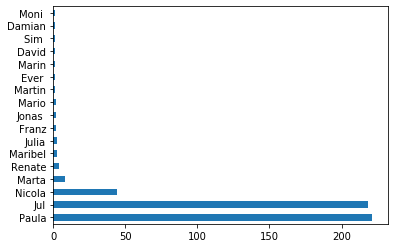

In [52]:
df.loc[df['jul and paula'] == True, 'Winner'].value_counts().plot.barh()

In [53]:
## 1. total time playing games in the last two years

In [54]:
minutes = df['Duration'].sum()
hours = int(round(minutes/60, 0))
days = round(hours/24, 1)

In [55]:
print(f'You\'ve played {minutes} minutes in the last 2 years.')
print(f'That\'s {hours} hours. Or {days} days!')

You've played 45061 minutes in the last 2 years.
That's 751 hours. Or 31.3 days!


In [56]:
df.groupby(['bggName','Winner']).count()

Date  Duration  gameRefId  \
bggName                      Winner                              
7 Wonders Duel               Paula      3         3          3   
Abyss                        Jul        4         4          4   
                             Paula      4         4          4   
Acquire                      Paula      1         1          1   
Adventure Games: The Dungeon Jul        3         3          3   
...                                   ...       ...        ...   
Wingspan                     Jul       10        10         10   
                             Paula      5         5          5   
Wizard                       Jul       33        33         33   
                             Nicola    42        42         42   
                             Paula     18        18         18   

                                     Number of players  jul vs paula  \
bggName                      Winner                                    
7 Wonders Duel               Paula                   3             3   
Abyss                        Jul                     4             4   
                             Paula                   4             4   
Acquire                      Paula                   1             1   
Adventure Games: The Dungeon Jul                     3             3   
...                                                ...           ...   
Wingspan                     Jul                    10            10   
                             Paula                   5             5   
Wizard                       Jul                    33            33   
                             Nicola                 42            42   
                             Paula                  18            18   

                                     jul and paula  Coop  Scores difference  \
bggName                      Winner                                           
7 Wonders Duel               Paula               3     3                  1   
Abyss                        Jul                 4     4                  4   
                             Paula               4     4                  4   
Acquire                      Paula               1     1                  1   
Adventure Games: The Dungeon Jul                 3     3                  0   
...                                            ...   ...                ...   
Wingspan                     Jul                10    10                 10   
                             Paula               5     5                  5   
Wizard                       Jul                33    33                 33   
                             Nicola             42    42                 39   
                             Paula              18    18                 18   

                                     id  bggYear  bggId  Year  Month  Day  \
bggName                      Winner                                         
7 Wonders Duel               Paula    3        3      3     3      3    3   
Abyss                        Jul      4        4      4     4      4    4   
                             Paula    4        4      4     4      4    4   
Acquire                      Paula    1        1      1     1      1    1   
Adventure Games: The Dungeon Jul      3        3      3     3      3    3   
...                                  ..      ...    ...   ...    ...  ...   
Wingspan                     Jul     10       10     10    10     10   10   
                             Paula    5        5      5     5      5    5   
Wizard                       Jul     33       33     33    33     33   33   
                             Nicola  42       42     42    42     42   42   
                             Paula   18       18     18    18     18   18   

                                     Hour  Month_Year  Week_Year  
bggName                      Winner                               
7 Wonders Duel               Paula      3           3          3  
Abyss     

In [62]:
df2 = df[['Week_Year', 'Duration']]

In [63]:
df2 = df2.set_index('Week_Year')

In [64]:
#2.[1] Es para arreglar esto:

In [65]:
df['Duration_h'] = round(df['Duration']/60)

In [66]:
sns.set_context("talk", font_scale=0.8)

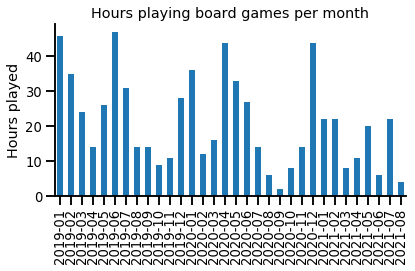

In [67]:
df.groupby('Month_Year')['Duration_h'].sum().plot.bar()
sns.despine()
plt.ylabel('Hours played')
plt.title('Hours playing board games per month')
plt.xlabel('')
plt.tight_layout()
#plt.savefig('graphs/Hours_played_per_month.png', )

In [68]:
#3.[3] Tambien para arreglar esto:

In [69]:
colors_players = [colors_jp[1],colors_jp[0], colors_qual[0],colors_qual[1],colors_qual[2],colors_qual[3], colors_qual[4]]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.8% of the points

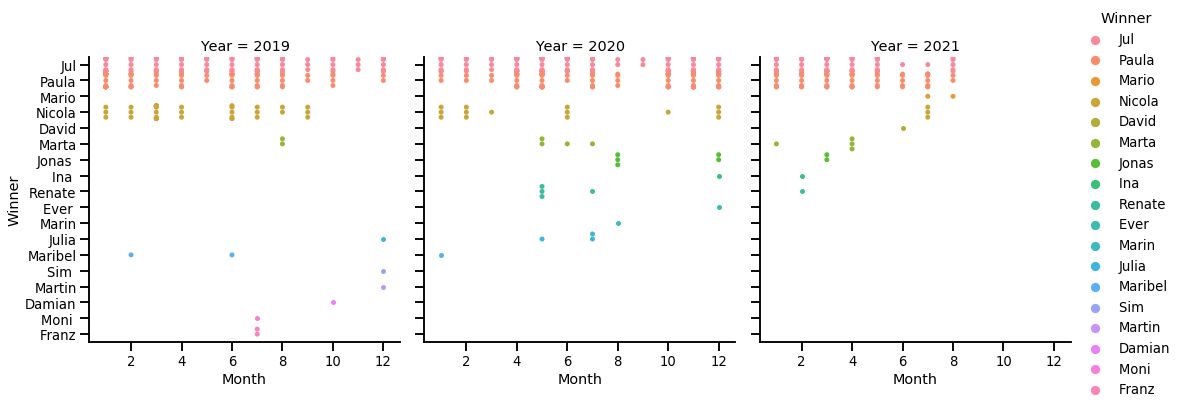

In [70]:
sns.catplot(data = df, x = 'Month', y = 'Winner', col = 'Year', hue = 'Winner',kind="swarm" )
sns.despine()
#plt.title('How we stopped playing with other people')
#plt.savefig('graphs/Games_won_per_month.png')

In [73]:
#4. Who wins more? 

In [74]:
df_jp = df[df['jul vs paula'] == True]

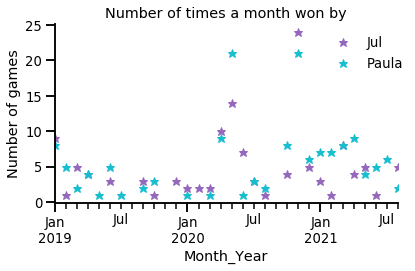

In [75]:
df[df['jul vs paula'] == True].groupby('Month_Year')['Winner'].value_counts().unstack().plot(marker = '*', linestyle='none', color = colors_jp )
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('Number of games')
plt.title('Number of times a month won by')
plt.tight_layout()
plt.savefig('graphs/Number_of_wins_by_jul_paula.png')

In [76]:
df['Duration_h'] = df['Duration']/60

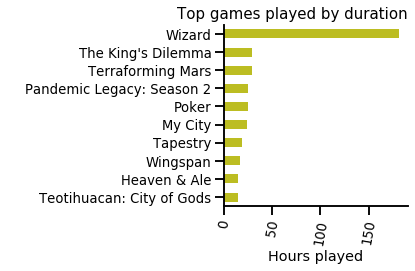

In [77]:
df.groupby(['bggName'])['Duration_h'].sum().sort_values(ascending=False).head(10).plot.barh(color = colors_qual[2])
sns.despine()
#plt.ylabel('Minutes played')
plt.xticks(rotation=80)
plt.xlabel('Hours played')
plt.ylabel(' ')
plt.gca().invert_yaxis()
plt.title('Top games played by duration', size = 15, loc = 'right')
plt.tight_layout()
plt.savefig('graphs/Top_games_by_duration.png')

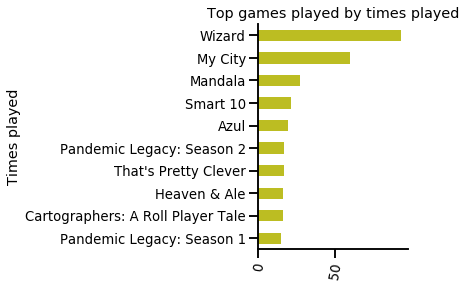

In [79]:
df.groupby(['bggName'])['Duration'].count().sort_values(ascending=False).head(10).plot.barh(color = colors_qual[2])
sns.despine()
plt.ylabel('Times played')
plt.xticks(rotation=80)
plt.xlabel('')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.title('Top games played by times played')
plt.savefig('graphs/Top_games_by_times_played.png')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points

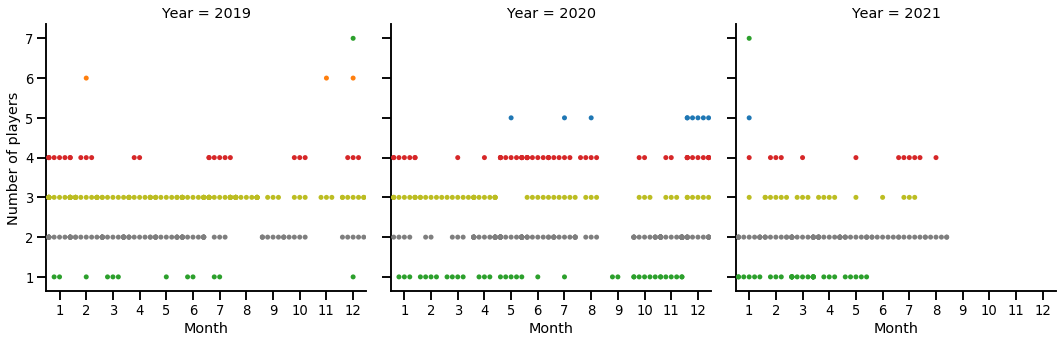

In [80]:
sns.catplot(data = df, x = 'Month', y = 'Number of players', col = 'Year', hue = 'Number of players', palette= colors_qual,kind="swarm", legend= False)
sns.despine()
plt.tight_layout()
plt.savefig('graphs/Games_players_per_month.png')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points

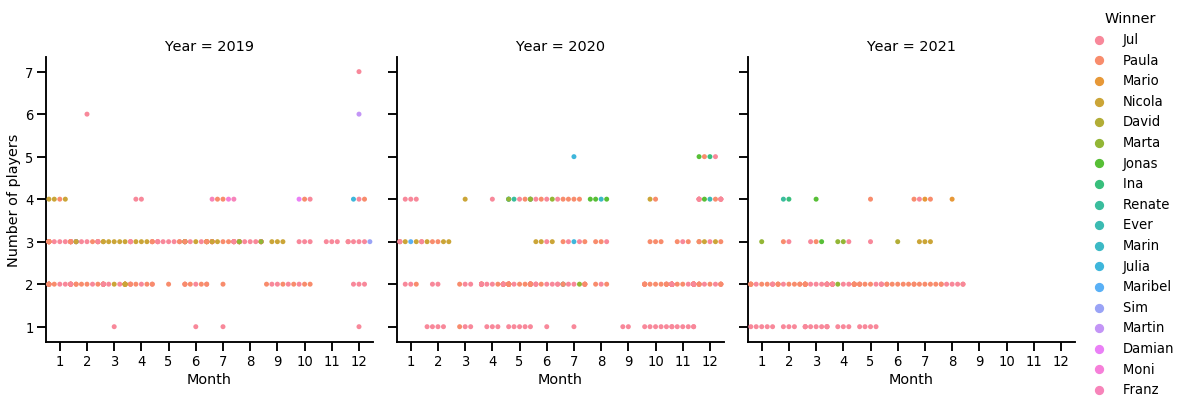

In [82]:
sns.catplot(data = df, x = 'Month', y = 'Number of players', col = 'Year', hue = 'Winner',kind="swarm", legend_out = True)
sns.despine()
#plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.savefig('graphs/Who_wins_players_per_month.png')

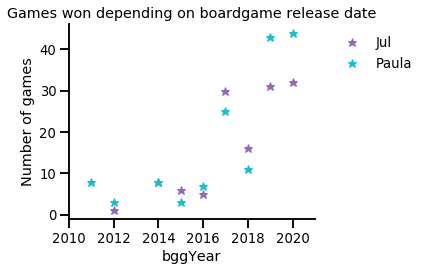

In [83]:
df[df['jul vs paula'] == True].groupby('bggYear')['Winner'].value_counts().unstack().plot(marker = '*', linestyle='none', color = colors_jp)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('Number of games')
plt.title('Games won depending on boardgame release date')
plt.tight_layout()
plt.xlim([2010,2021])
plt.savefig('graphs/wins_by_jul_paula_year_bg.png')

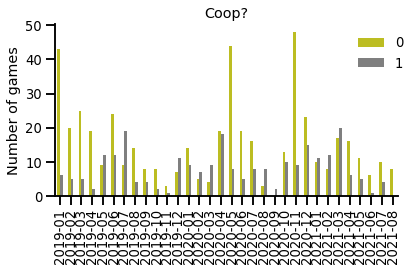

In [84]:
df.groupby('Month_Year')['Coop'].value_counts().unstack().plot.bar(color = [colors_qual[2],colors_qual[1]])
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('Number of games')
plt.xlabel('')
plt.title('Coop?')
plt.tight_layout()
plt.savefig('graphs/coop_vs_not.png')

In [85]:
df['Players_binned'] = df['Number of players']
df.loc[df['Number of players'] > 2,'Players_binned'] = '3 or more'

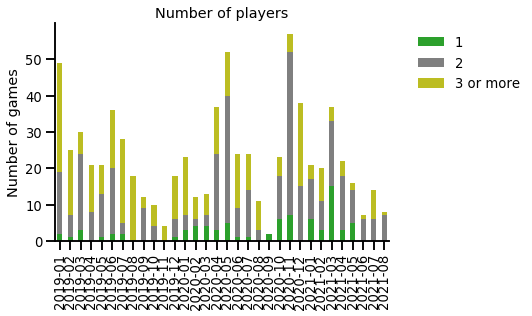

In [87]:
df.groupby('Month_Year')['Players_binned'].value_counts().unstack().plot.bar(color = colors_qual, stacked=True)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('Number of games')
plt.xlabel('')
plt.title('Number of players')
#plt.tight_layout()
plt.savefig('graphs/Games_players_per_month.png')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points

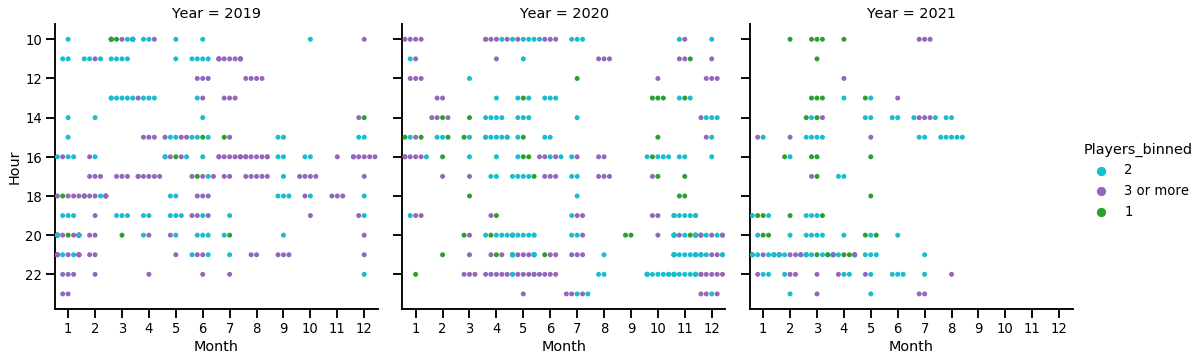

In [88]:
sns.catplot(data = df, x = 'Month', y = 'Hour', col = 'Year', hue = 'Players_binned', palette= colors_players,kind="swarm", legend_out = True)
sns.despine()
plt.gca().invert_yaxis()
#plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.savefig('graphs/Hour_we_played_over_month.png')

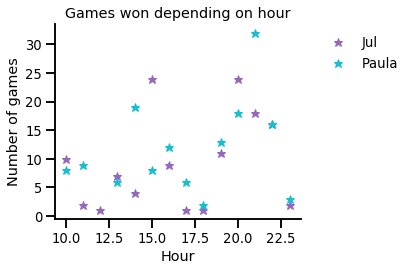

In [89]:
df[df['jul vs paula'] == True].groupby('Hour')['Winner'].value_counts().unstack().plot(marker = '*', linestyle='none', color = colors_jp)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('Number of games')
plt.title('Games won depending on hour')
plt.tight_layout()
plt.savefig('graphs/Winner_by_hour.png')

In [90]:
df3 = df.loc[(df['bggName'] != "Love Letter") & (df['bggName'] != "My City") , ['Duration', 'Winner','Scores difference', 'bggName']].sort_values('Scores difference').head(7)

In [91]:
df3.loc[280,'bggName'] = 'Wingspan_'
df3.loc[201,'bggName'] = 'Azul'
df3.loc[149,'bggName'] = 'Marco Polo'
df3.loc[148,'bggName'] = 'Cartographers'

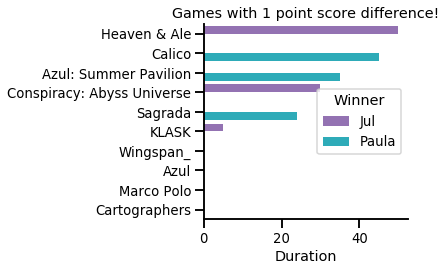

In [92]:
sns.barplot(data = df3.sort_values('Duration', ascending = False), y = 'bggName', x = 'Duration', hue = 'Winner', palette= colors_jp, orient = 'h')
sns.despine()
#plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.ylabel('')
plt.title('Games with 1 point score difference!')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('graphs/games_lost_by_one.png')

In [93]:
df4 = df.groupby('bggName').agg({'Date':['min', 'count'],'Duration':'sum'})

In [95]:
df4.columns = ['Date', 'Times_played', 'Minutes_played']

In [96]:
df4['Hours_played'] = round(df4['Minutes_played']/60,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


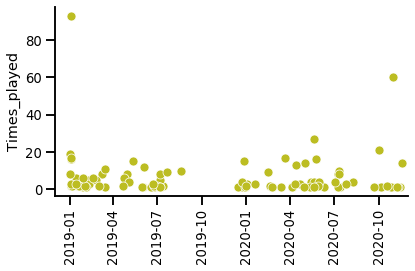

In [98]:
sns.scatterplot(x = df4['Date'], y = df4['Times_played'], c = colors_qual[2])
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.savefig('graphs/games_date_times_played.png')

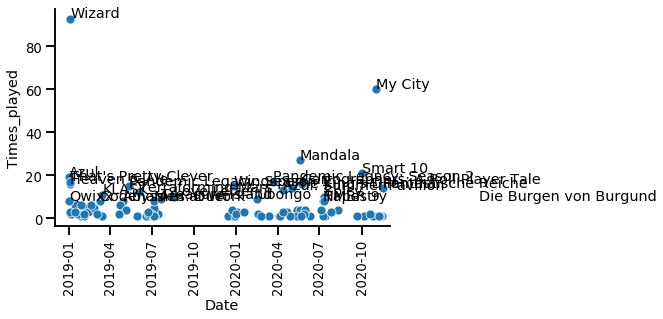

In [99]:
p1 = sns.scatterplot(data = df4, x = 'Date', y = 'Times_played')
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
sns.despine()

# add annotations one by one with a loop
for line in range(0,df4.shape[0]):
    if df4.Times_played[line] > 7:
        p1.text(df4.Date[line], df4.Times_played[line]+0.6, s = df4.index[line])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


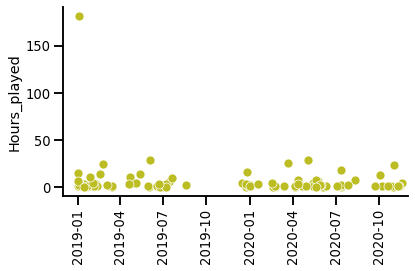

In [100]:
sns.scatterplot(data = df4, x = 'Date', y = 'Hours_played', c = colors_qual[2])
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.savefig('graphs/games_date_hours_played.png')

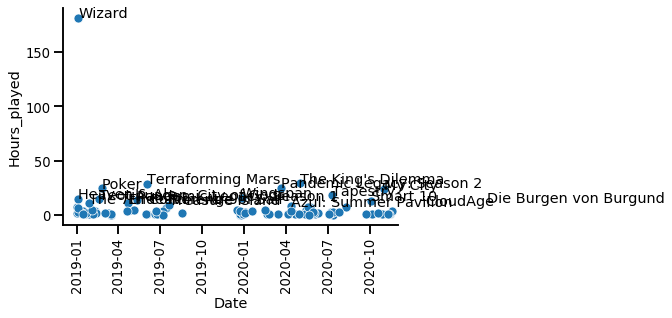

In [101]:
p2 = sns.scatterplot(data = df4, x = 'Date', y = 'Hours_played')
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
sns.despine()
# add annotations one by one with a loop
for line in range(0,df4.shape[0]):
    if df4.Hours_played[line] > 8:
        p2.text(df4.Date[line], df4.Hours_played[line], s = df4.index[line])

In [102]:
df4['Month_Year'] = pd.to_datetime(df4['Date']).dt.to_period('M')

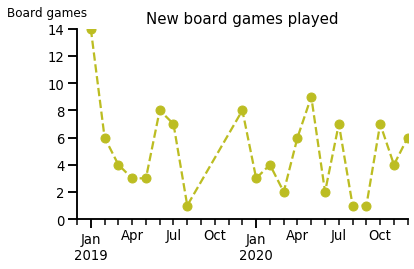

In [104]:
ax = plt.gca()
df4.groupby('Month_Year')['Date'].count().plot(marker = 'o', c = colors_qual[2], linestyle='--')
sns.despine()
plt.xlabel('')
plt.ylabel('Board games',rotation=0, size = 12)
ax.yaxis.set_label_coords(-0.09,1.05)
plt.title('New board games played',size = 15, loc = 'center')
plt.ylim([0,14])
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
plt.tight_layout()
plt.savefig('graphs/new_board_games_per_month.png')

In [106]:
df4 = df.groupby('bggName').agg({'Date':['min', 'count'],'Duration':'sum'})

In [107]:
df5 = df.groupby('Month_Year').agg({'Duration':'sum'})
df5['Duration'] = round(df5['Duration']/60,1)

In [108]:
p = df5.index

In [109]:
ts = p.to_timestamp

In [110]:
ts

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08'],
            dtype='period[M]', name='Month_Year', freq='M')>

In [111]:
import numpy as np
y = np.array(df5.cumsum()['Duration'])

Text(0, 0.5, 'Total hours played')

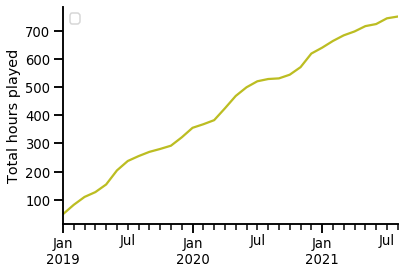

In [112]:
df5.cumsum().plot(c = colors_qual[2])
plt.legend('')
sns.despine()
plt.xlabel('')
plt.ylabel('Total hours played')

In [115]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
X = np.expand_dims(np.arange(len(y)), axis=1)
y = np.array(df5.cumsum()['Duration'])
m.fit(X,y)

LinearRegression()

In [116]:
m.intercept_

74.65454545454537

In [117]:
m.coef_

array([23.04365836])

In [118]:
np.array(df5.cumsum()['Duration'])

array([ 48.1,  81.5, 109.6, 126.7, 153.9, 203.9, 237.3, 254.7, 269.8,
       280.2, 291.8, 321.5, 355.4, 368.1, 382.6, 424.8, 468.8, 499.6,
       520.9, 528.9, 531.2, 544.3, 571.1, 619.5, 640.4, 664.3, 684.3,
       698.1, 717. , 724.4, 744.8, 751.1])

In [119]:
m.predict(X)

array([ 74.65454545,  97.69820381, 120.74186217, 143.78552053,
       166.82917889, 189.87283724, 212.9164956 , 235.96015396,
       259.00381232, 282.04747067, 305.09112903, 328.13478739,
       351.17844575, 374.22210411, 397.26576246, 420.30942082,
       443.35307918, 466.39673754, 489.44039589, 512.48405425,
       535.52771261, 558.57137097, 581.61502933, 604.65868768,
       627.70234604, 650.7460044 , 673.78966276, 696.83332111,
       719.87697947, 742.92063783, 765.96429619, 789.00795455])

In [120]:
df5['Model'] = m.predict(X)
df5['Total_h_played'] = df5.Duration.cumsum()
df5.drop('Duration', axis = 1, inplace = True)

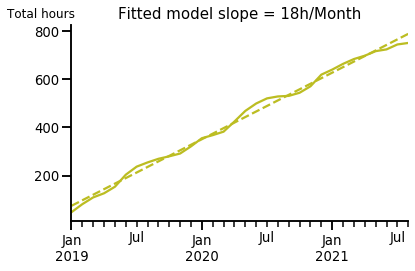

In [121]:
ax = plt.gca()
df5.Total_h_played.plot(c = colors_qual[2])
df5.Model.plot(c = colors_qual[2], linestyle = '--')
sns.despine()
plt.xlabel('')
plt.ylabel('Total hours',rotation=0, size = 12)
ax.yaxis.set_label_coords(-0.09,1.02)
plt.title('Fitted model slope = 18h/Month', size = 15)
plt.tight_layout()
plt.savefig('graphs/model_hours_per_month.png')

In [122]:
df4 = df.groupby('bggName').agg({'Date':['min', 'count'],'Duration':'sum'})

In [123]:
plays_or = pd.DataFrame(data['plays'])

In [124]:
plays_or.head(2)

,rating,uuid,ignored,scoringSetting,metaData,playerScores,modificationDate,playDate,manualWinner,rounds,usesTeams,bggId,entryDate,playImages,durationMin,nemestatsId,gameRefId,bggLastSync,comments,board
0,0,8C95641F-7A23-4BF2-AAE6-97D0FB21AB0E,False,0,"{""playUsedGameCopy"":0}","[{'winner': True, 'seatOrder': 0, 'score': '33...",2021-08-08 15:34:04,2021-08-08 15:33:50,True,0,False,0,2021-08-08 15:33:50,[],24,0,98,NaN,NaN,NaN
1,0,BC1111EC-DFE8-4233-8DC6-D73DDE89E4C8,False,0,"{""playUsedGameCopy"":0}","[{'winner': False, 'seatOrder': 0, 'score': '2...",2021-08-08 15:20:18,2021-08-08 15:20:09,False,0,False,0,2021-08-08 15:20:09,[],25,0,98,NaN,NaN,NaN


In [125]:
### get new players

In [126]:
plays_or = plays_or.sort_values('playDate')

In [127]:
dates = []
all_players = []
all_players_competitive = []
winners = []
players_games = {}
competitive_games = {}

for r in plays_or.iterrows():
    number_players.append(len(r[1]['playerScores']))
    new_players = []
    competitive = 0
    for player in range(len(r[1]['playerScores'])):
        if r[1]['playerScores'][player]['playerRefId'] in all_players: 
            players_games[r[1]['playerScores'][player]['playerRefId']] += 1
        else: 
            all_players.append(r[1]['playerScores'][player]['playerRefId'])
            players_games[r[1]['playerScores'][player]['playerRefId']] = 1
            competitive_games[r[1]['playerScores'][player]['playerRefId']] = 0
            dates.append(r[1]['playDate'])
        if r[1]['playerScores'][player]['winner'] == True:
            competitive = 1
            winners.append(r[1]['playerScores'][player]['playerRefId'])
        if (r[1]['playerScores'][player]['score'] != '') | (competitive == 1):
            if r[1]['playerScores'][player]['playerRefId'] in all_players_competitive: 
                competitive_games[r[1]['playerScores'][player]['playerRefId']] += 1 
            else: 
                all_players_competitive.append(r[1]['playerScores'][player]['playerRefId'])
                competitive_games[r[1]['playerScores'][player]['playerRefId']] = 1

In [128]:
players_wins = []
for player in all_players:
    players_wins.append(winners.count(player))

In [129]:
players_games_list = []
for player in all_players:
    players_games_list.append(players_games[player])

In [130]:
players_competitive_games = []
for player in all_players:
    players_competitive_games.append(competitive_games[player])

In [131]:
players_names = []
for player in all_players:
    players_names.append(players_dic[player])

In [132]:
players_names = []
for player in all_players:
    players_names.append(players_dic[player])

In [133]:
our_players = pd.DataFrame({'name':players_names, 'games':players_games_list, 'competitive':players_competitive_games ,'wins':players_wins, 'first_time': dates})

In [134]:
our_players['first_time'] = pd.to_datetime(our_players['first_time']).dt.date

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


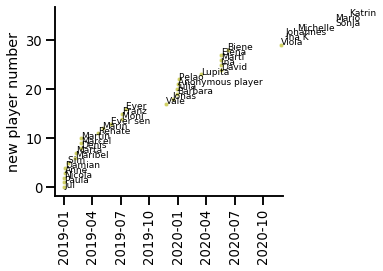

In [136]:
p = sns.scatterplot(data = our_players, x = 'first_time', y = our_players.index.values, marker = '.', alpha = 0.7, c = colors_qual[2])
sns.despine()
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
plt.ylabel('new player number')
plt.xlabel('')
# add annotations one by one with a loop
for line in range(0,our_players.shape[0]):
    p.text(our_players.first_time[line], our_players.index.values[line], s = our_players.name[line], size = 9)
plt.tight_layout()
plt.savefig('graphs/new_players.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


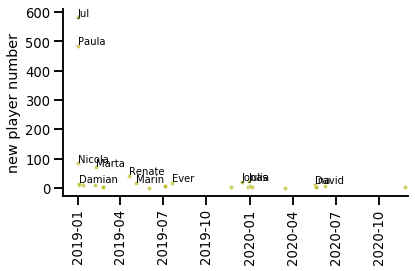

In [137]:
p = sns.scatterplot(data = our_players, x = 'first_time', y = our_players.games, marker = '.', alpha = 0.7, c = colors_qual[2])
sns.despine()
plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2018-12'),pd.to_datetime('2020-12')])
plt.ylabel('new player number')
plt.xlabel('')
# add annotations one by one with a loop
for line in range(0,our_players.shape[0]):
    if our_players.games[line] > 9:
        p.text(our_players.first_time[line], our_players.games[line]+5, s = our_players.name[line], size = 10)
plt.tight_layout()
plt.savefig('graphs/games_by_players.png')

In [138]:
our_players['percentage_wins'] = round(our_players['wins']/our_players['competitive']*100,0)

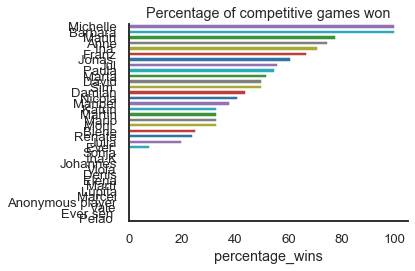

In [141]:
import seaborn as sns
sns.set_style("white")
sns.barplot(data = our_players.loc[our_players['competitive'] != 0, our_players.columns].sort_values('percentage_wins', ascending = False), y = 'name', x = 'percentage_wins', palette = [colors_players[1], colors_players[0], colors_players[2],colors_players[3],colors_players[4],colors_players[5], colors_players[6]] )
sns.despine()
plt.ylabel('')
plt.title('Percentage of competitive games won')
plt.tight_layout()
plt.savefig('graphs/percentage_wins.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


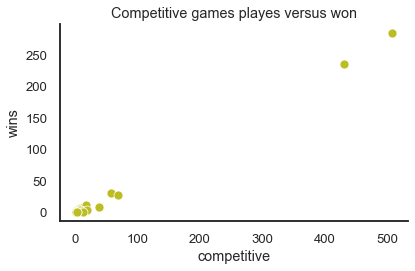

In [142]:
competetitive_df = our_players.loc[our_players['competitive'] != 0, our_players.columns].sort_values('percentage_wins', ascending = False)
sns.scatterplot(data = competetitive_df, x = 'competitive', y = 'wins', c = colors_qual[2])
plt.title('Competitive games playes versus won')
#for line in range(0,competetitive_df.shape[0]):
    #print(competetitive_df.competitive[line])
    #p.text(competetitive_df.competitive[line], competetitive_df.wins[line], s = competetitive_df.name[line], size = 10)
plt.tight_layout()
sns.despine()
plt.savefig('graphs/competitive_vs_wins.png')

In [143]:
our_players.head()

,name,games,competitive,wins,first_time,percentage_wins
0,Jul,581,508,285,2019-01-01,56.0
1,Paula,484,431,236,2019-01-01,55.0
2,Nicola,84,69,28,2019-01-01,41.0
3,Anne,8,4,3,2019-01-04,75.0
4,Damian,14,9,4,2019-01-04,44.0


In [144]:
our_players['percentage_competitive'] = round(our_players['competitive']/our_players['games']*100,0)

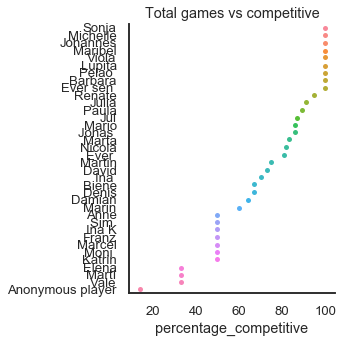

In [146]:
sns.catplot(data = our_players.sort_values('percentage_competitive', ascending = False), x = 'percentage_competitive', y = 'name')
plt.title('Total games vs competitive')
plt.ylabel('')
#for line in range(0,competetitive_df.shape[0]):
    #print(competetitive_df.competitive[line])
    #p.text(competetitive_df.competitive[line], competetitive_df.wins[line], s = competetitive_df.name[line], size = 10)
plt.tight_layout()
sns.despine()
#plt.savefig('graphs/competitive_vs_all.png')

In [147]:
riddles = ['Adventure Games: Monochrome Inc.','Adventure Games: The Volcanic Island', 'Deckscape: Behind the Curtain','Deckscape: Escape from Alcatraz', 'Deckscape: Test Time',
       'Deckscape: The Curse of the Sphinx', 'Deckscape: The Fate of London',
       'Deckscape: The Mystery of Eldorado',
       'Detective Stories: Case 1 – The Fire in Adlerstein',
       'Detective Stories: Demo "Gattardo"',
       'Detective Stories: Fall 2 – Antarktis Fatale',
       'Detective:  L.A. Crimes','EXIT: Das Spiel – Die Känguru-Eskapaden','Exit: The Game – The Cemetery of the Knight',
       'Exit: The Game – The Enchanted Forest',
       'Exit: The Game – The Forbidden Castle',
       'Exit: The Game – The Forgotten Island',
       'Exit: The Game – The Haunted Roller Coaster',
       'Exit: The Game – The Mysterious Museum',
       'Exit: The Game – The Pharaoh\'s Tomb',
       'Exit: The Game – The Polar Station',
       'Exit: The Game – The Sinister Mansion',
       'Exit: The Game – The Stormy Flight',
       'Exit: The Game – The Sunken Treasure', 'Unlock!: Escape Adventures', 'Unlock!: Exotic Adventures',
       'Unlock!: Heroic Adventures', 'Unlock!: Mystery Adventures',
       'Unlock!: Secret Adventures','T.I.M.E Stories', 'T.I.M.E Stories: Expedition – Endurance',
       'T.I.M.E Stories: Under the Mask']
two_players = ['7 Wonders Duel','Mandala','Targi']
puzzles = ['Cartographers: A Roll Player Tale', 'Patchwork', 'My City','NMBR 9']

In [150]:
df4.reset_index(inplace = True)
riddles_df = df4[df4['bggName'].isin(riddles)]

In [151]:
riddles_df.index.values

array([  3,   6,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  37,
        42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53, 108, 109,
       110, 132, 133, 134, 135, 136])

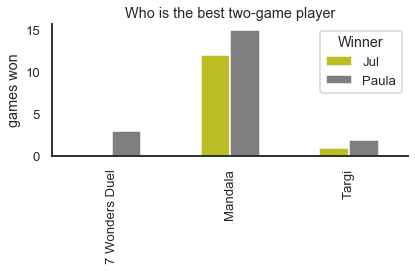

In [154]:
df[df['bggName'].isin(two_players)].groupby(['bggName', 'Winner'])['Date'].count().unstack('Winner').plot.bar(color = [colors_qual[2],colors_qual[1]])
sns.despine()
plt.xticks(rotation=90)
plt.ylabel('games won')
plt.xlabel('')
plt.title('Who is the best two-game player')
plt.tight_layout()
plt.savefig('graphs/two_player_games.png')

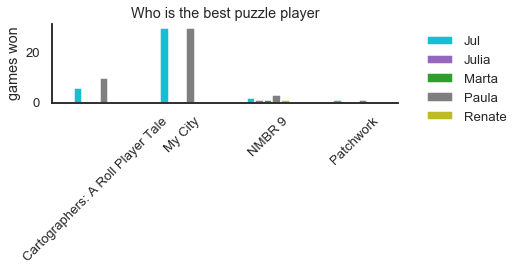

In [155]:
df[df['bggName'].isin(puzzles)].groupby(['bggName', 'Winner'])['Date'].count().unstack('Winner').plot.bar(color = colors_players)
sns.despine()
plt.xticks(rotation=45)
plt.ylabel('games won')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.title('Who is the best puzzle player')
plt.tight_layout()
plt.savefig('graphs/puzzle_games.png')

In [156]:
games_wins = df[df['Winner'].isin(['Jul', 'Paula'])].groupby(['bggName', 'Winner'])['Date'].count().unstack()

In [157]:
games_wins.fillna(0, inplace= True)

In [159]:
games_wins.head()

Winner,Jul,Paula
bggName,,
7 Wonders Duel,0.0,3.0
Abyss,4.0,4.0
Acquire,0.0,1.0
Adventure Games: The Dungeon,3.0,0.0
Adventure Games: The Volcanic Island,4.0,0.0


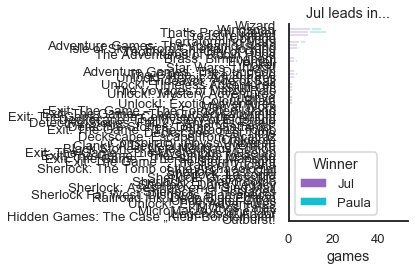

In [160]:
games_wins[games_wins['Jul'] > games_wins['Paula']].sort_values('Jul').plot.barh(stacked = True, color = colors_jp)
sns.despine()
plt.ylabel('')
plt.xlabel('games')
plt.title('Jul leads in...')
plt.tight_layout()
plt.savefig('graphs/Jul_leads.png')

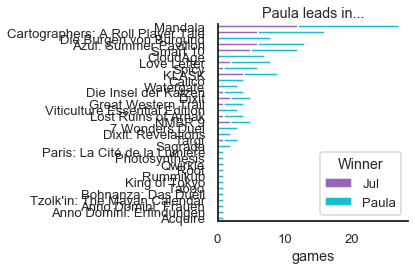

In [161]:
games_wins[games_wins['Paula'] > games_wins['Jul']].sort_values('Paula').plot.barh(stacked = True,color = colors_jp)
sns.despine()
plt.ylabel('')
plt.xlabel('games')
plt.title('Paula leads in...')
plt.tight_layout()
plt.savefig('graphs/Paula_leads.png')

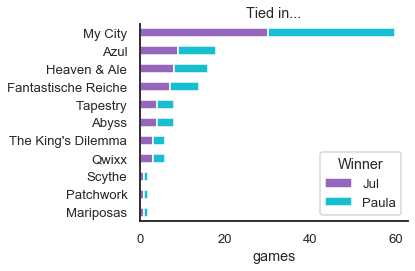

In [162]:
games_wins[games_wins['Paula'] == games_wins['Jul']].sort_values('Paula').plot.barh(stacked = True, color = colors_jp)
sns.despine()
plt.xlabel('games')
plt.ylabel('')
plt.title('Tied in...')
plt.tight_layout()
plt.savefig('graphs/Tied.png')